In [110]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score


In [2]:
warnings.filterwarnings('ignore')

In [3]:
DF=pd.read_csv('data.csv')

In [4]:
DF.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [5]:
DF.shape

(128061, 9)

In [6]:
DF.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [7]:
DF.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [8]:
MV_PER=DF['Interest'].value_counts().rename('Count').reset_index()

In [9]:
def percentage(x):
    y=round((x/DF.shape[0])*100)
    return y

In [10]:
MV_PER['Percentange']=MV_PER['Count'].apply(percentage)

In [11]:
MV_PER

,Interest,Count,Percentange
0,Unknown,48835,38
1,Arts,25489,20
2,Others,21733,17
3,Technology,19103,15
4,Sports,12901,10


In [12]:
DF['Interest']=DF['Interest'].replace('Unknown','Others')

In [13]:
DF['Interest'].value_counts()

Interest
Others        70568
Arts          25489
Technology    19103
Sports        12901
Name: count, dtype: int64

In [14]:
le=LabelEncoder()

In [15]:
encode_cols=['Gender','Interest']

In [16]:
for i in encode_cols:
    DF['encoded_'+i]=le.fit_transform(DF[i])

In [17]:
DF.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,encoded_Gender,encoded_Interest
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Others,ENFP,1,1
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP,0,2
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Others,ENFP,0,1
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP,1,1
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP,0,3


In [18]:
DF.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,encoded_Gender,encoded_Interest
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Others,ENFP,1,1
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP,0,2
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Others,ENFP,0,1
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP,1,1
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP,0,3


In [19]:
DF['Personality'].unique()

array(['ENFP', 'ESFP', 'INTP', 'INFP', 'ENFJ', 'ENTP', 'ESTP', 'ISTP',
       'INTJ', 'INFJ', 'ISFP', 'ENTJ', 'ESFJ', 'ISFJ', 'ISTJ', 'ESTJ'],
      dtype=object)

In [20]:
DF['Personality_encoded']=le.fit_transform(DF['Personality'])

In [21]:
DF.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,encoded_Gender,encoded_Interest,Personality_encoded
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Others,ENFP,1,1,1
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP,0,2,5
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Others,ENFP,0,1,1
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP,1,1,11
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP,0,3,1


In [22]:
DF_encoded=DF

In [23]:
DF_Combined=DF_encoded

In [24]:
DF_Combined.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,encoded_Gender,encoded_Interest,Personality_encoded
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Others,ENFP,1,1,1
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP,0,2,5
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Others,ENFP,0,1,1
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP,1,1,11
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP,0,3,1


In [25]:
Scaler=StandardScaler()
Scaler_cols=['Introversion Score','Sensing Score','Thinking Score','Judging Score']
DF[Scaler_cols]= Scaler.fit_transform(DF[Scaler_cols])
DF[Scaler_cols].head()
DF_Combined[Scaler_cols] = DF[Scaler_cols]
DF_Combined.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,encoded_Gender,encoded_Interest,Personality_encoded
0,19.0,Male,0,1.548977,1.740607,0.363450,-0.156667,Others,ENFP,1,1,1
1,27.0,Female,0,0.296866,0.911320,-1.449241,-0.256451,Sports,ESFP,0,2,5
2,21.0,Female,0,0.723446,-1.431215,-0.806013,0.394536,Others,ENFP,0,1,1
3,28.0,Male,0,-1.030756,-0.218274,0.803258,1.011987,Others,INTP,1,1,11
4,36.0,Female,1,1.703455,-0.276203,0.113184,0.071085,Technology,ENFP,0,3,1


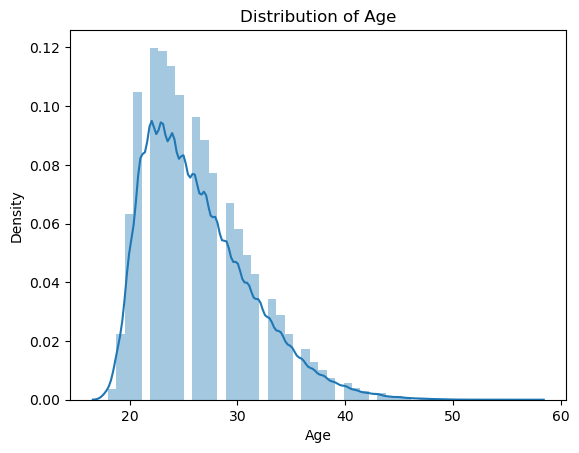

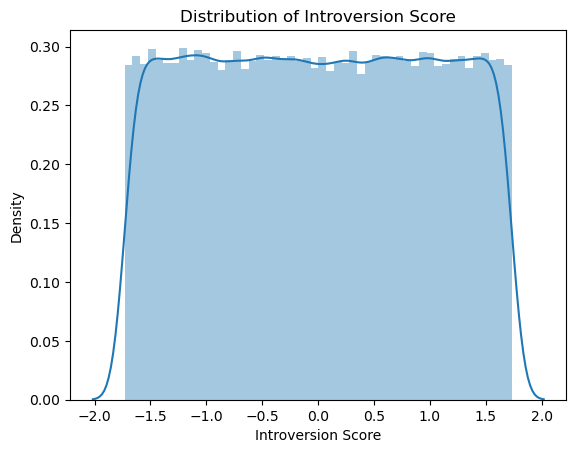

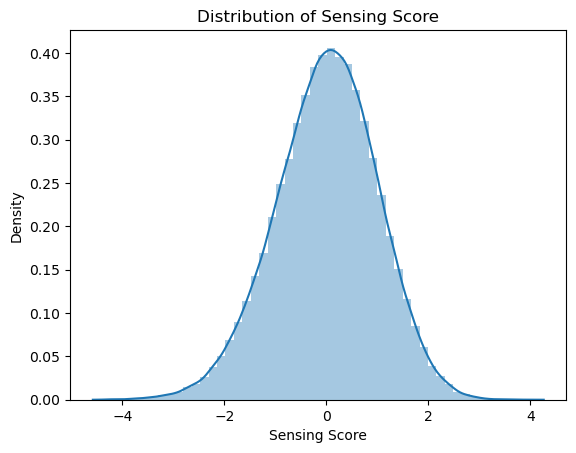

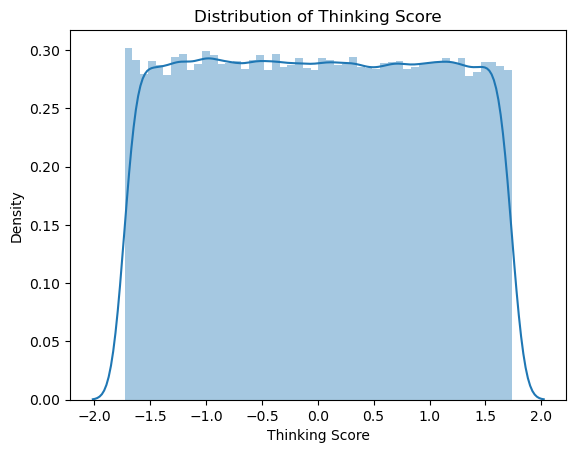

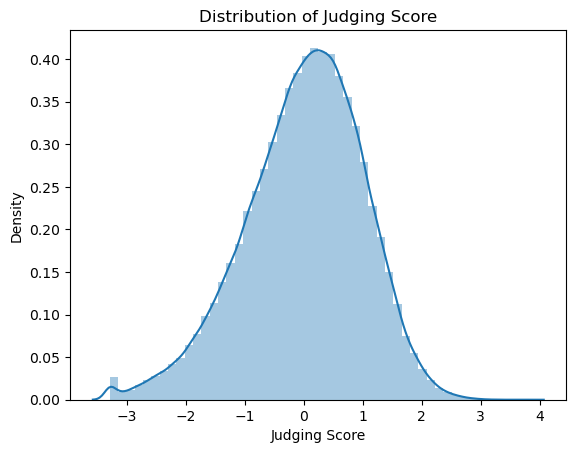

In [26]:
cols=DF.select_dtypes('float64')
for col in cols:
    sns.distplot(DF[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [27]:
demographics_cols=['Age', 'Gender', 'Education']

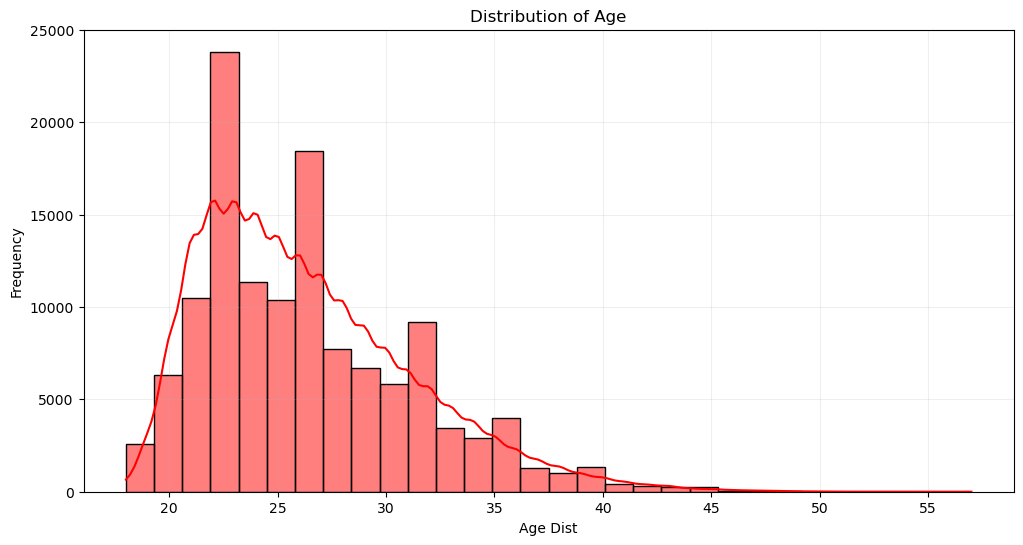

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(DF['Age'],bins=30,kde=True,color='red')
plt.grid(alpha=0.2)
plt.title('Distribution of Age')
plt.xlabel('Age Dist')
plt.ylabel('Frequency')
plt.show()

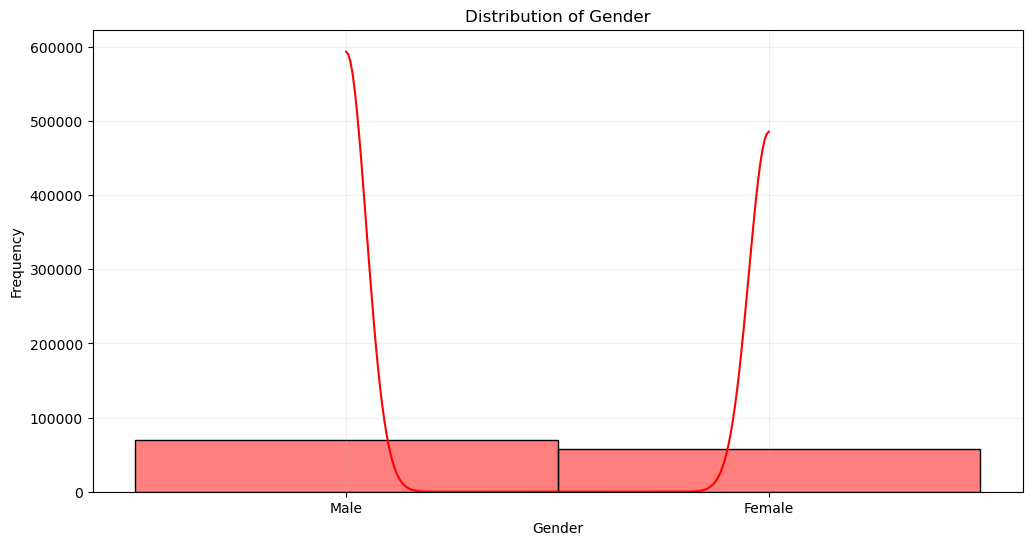

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(DF['Gender'],bins=30,kde=True,color='red')
plt.grid(alpha=0.2)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

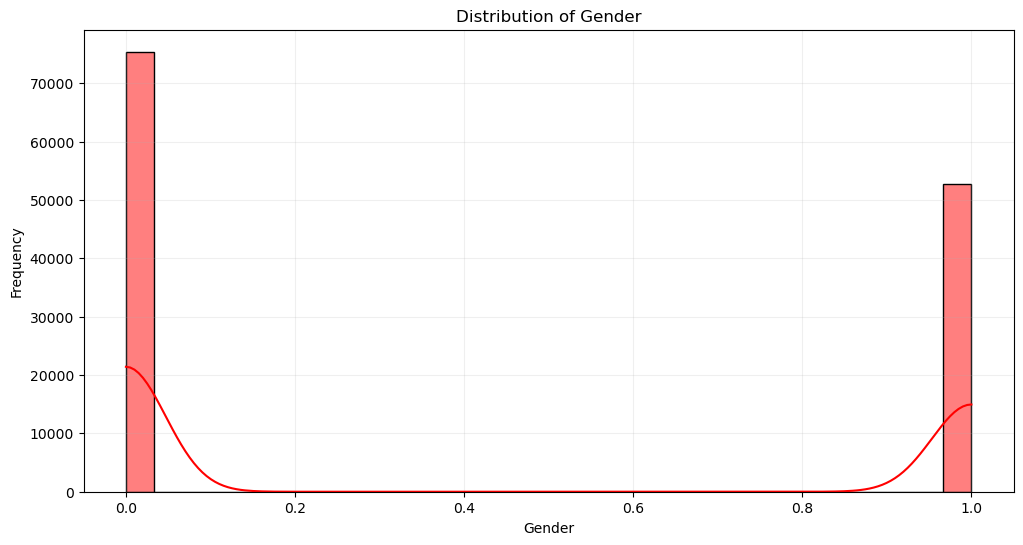

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(DF['Education'],bins=30,kde=True,color='red')
plt.grid(alpha=0.2)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [31]:
personality_Scores=['Introversion Score','Sensing Score','Thinking Score','Judging Score']

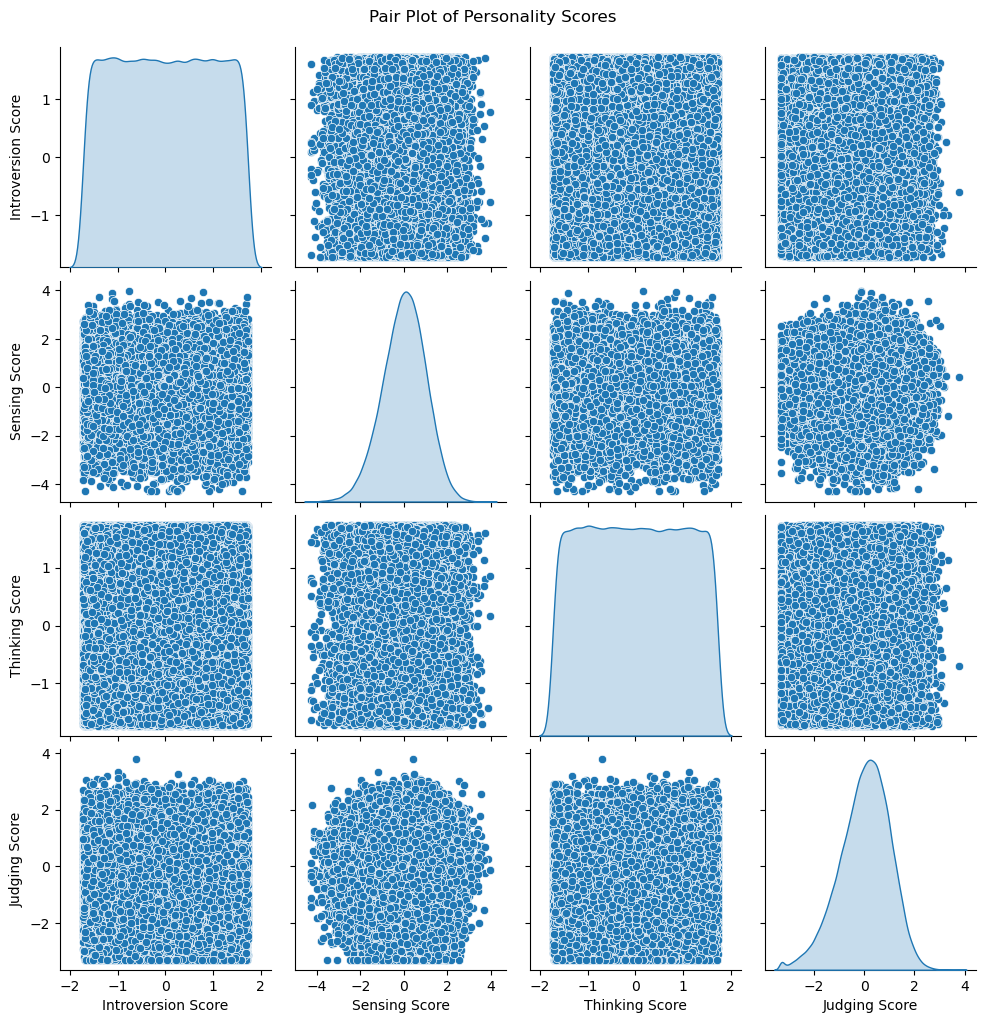

In [32]:
sns.pairplot(DF[personality_Scores], diag_kind='kde', markers='o', palette='Set1')
plt.suptitle('Pair Plot of Personality Scores', y=1.02)
plt.show()

In [33]:
columns=['Age','Introversion Score','Sensing Score','Thinking Score','Judging Score'] 

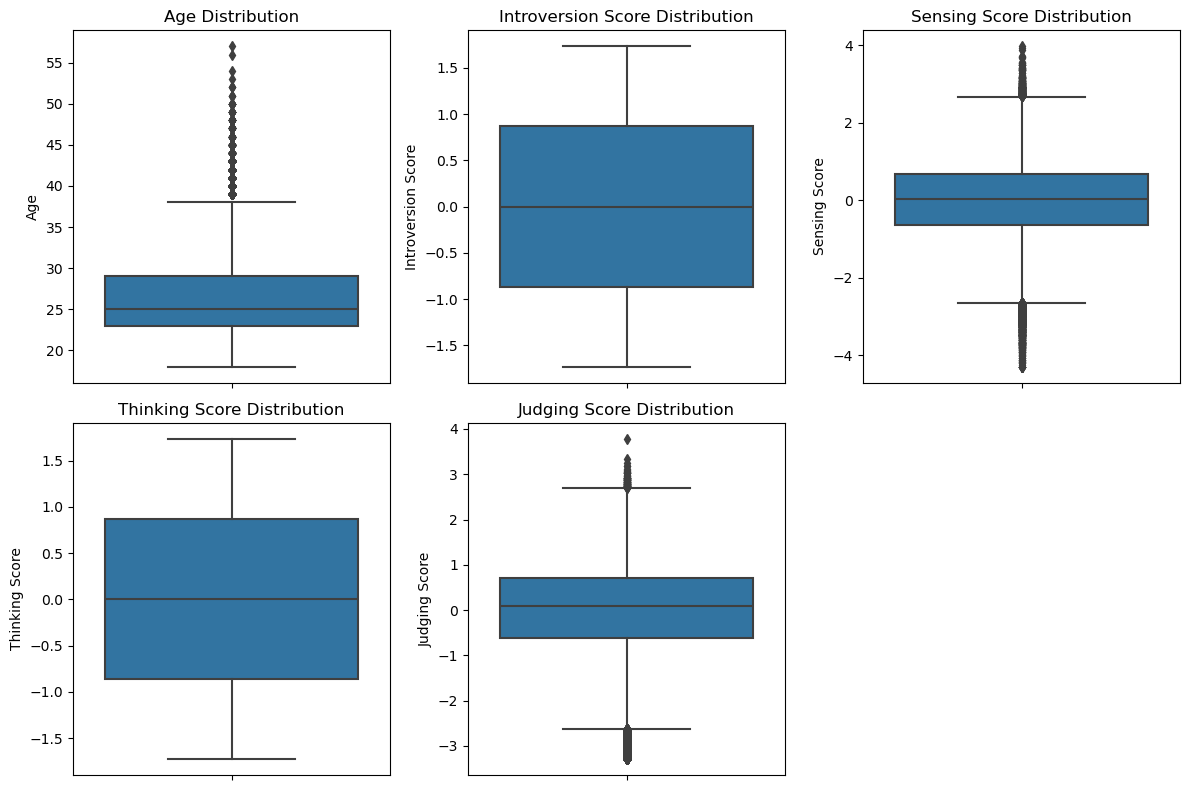

In [34]:
plt.figure(figsize=(12,8))
for i,column in enumerate(columns,1):
    plt.subplot(2, 3, i) 
    sns.boxplot(y=DF[column])
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

In [35]:
outlier=['Age','Sensing Score','Judging Score']

In [36]:
for i in outlier:
    Q1=DF[i].quantile(0.25)
    Q3=DF[i].quantile(0.75)
    IQR=Q3-Q1
    filter=(DF[i]>=Q1-1.5*IQR)&(DF[i] <= Q3 + 1.5*IQR)
    DF=DF.loc[filter]

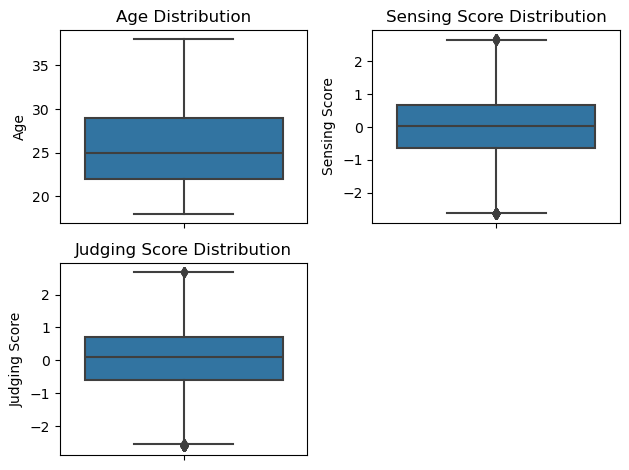

In [37]:
for i,column in enumerate(outlier,1):
    plt.subplot(2, 2, i) 
    sns.boxplot(y=DF[column])
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

In [38]:
correlation=DF.drop(columns=[i for i in DF.select_dtypes('object')])

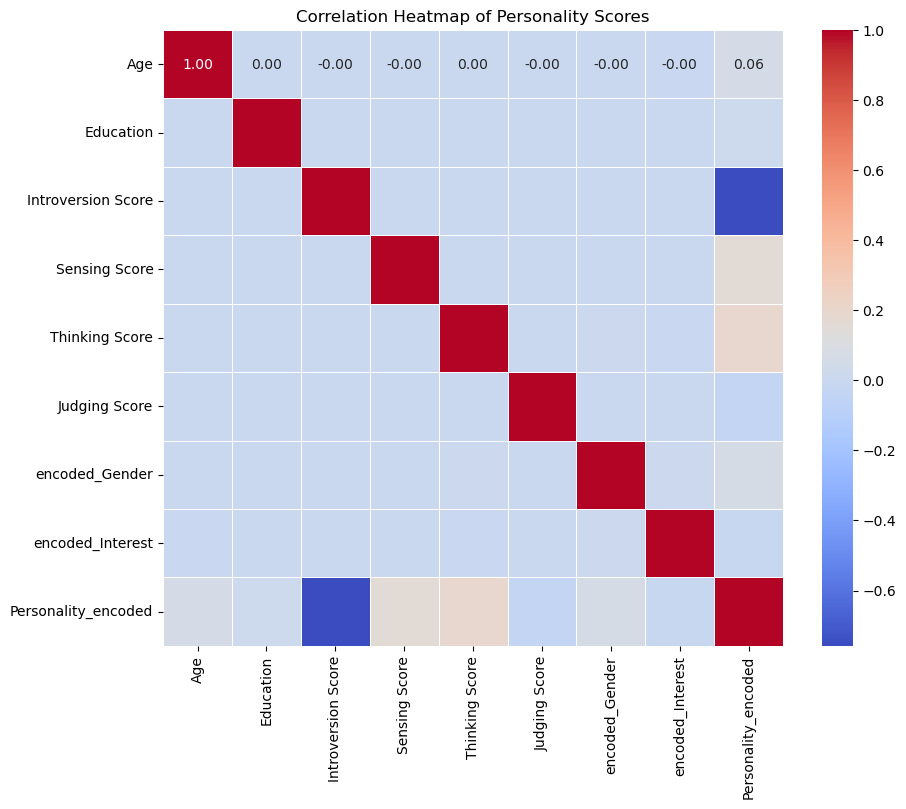

In [39]:
correlation = DF.drop(columns=[i for i in DF.select_dtypes('object')]).dropna().corr()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))  # Adjust the size if you have many columns
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and show plot
plt.title('Correlation Heatmap of Personality Scores')
plt.show()

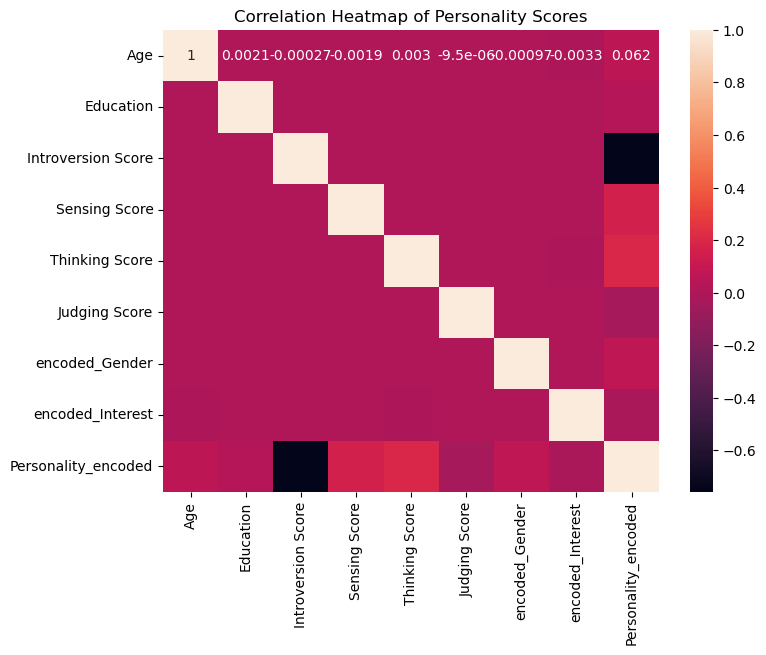

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap of Personality Scores')
plt.show()

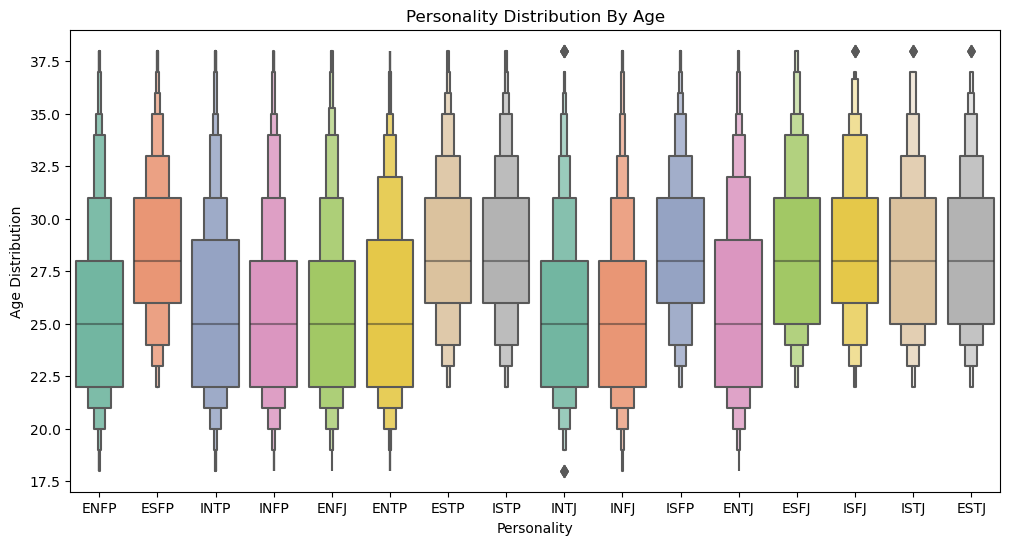

In [41]:
plt.figure(figsize=(12,6))
sns.boxenplot(x=DF['Personality'],y=DF['Age'],palette='Set2')
plt.title('Personality Distribution By Age')
plt.xlabel('Personality')
plt.ylabel('Age Distribution')
plt.show()

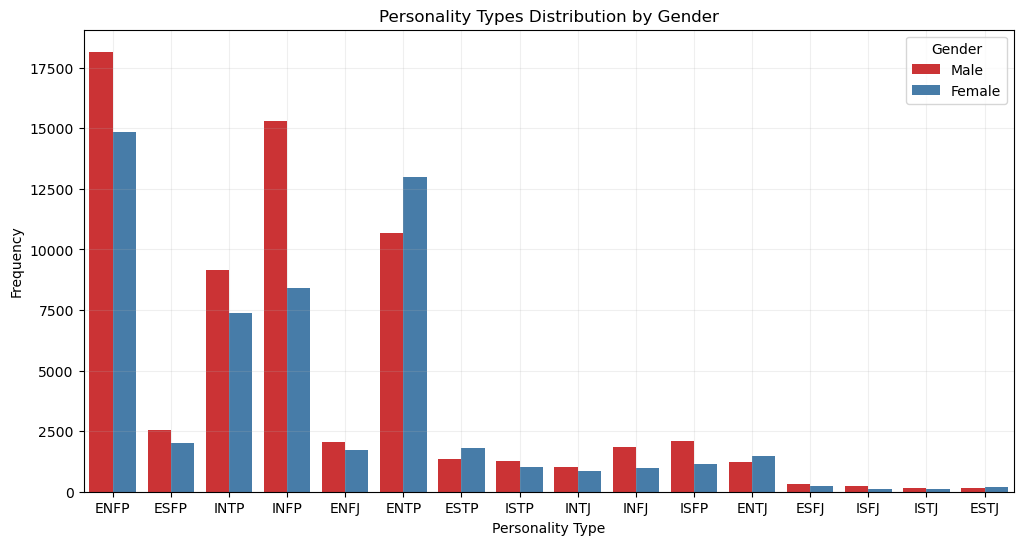

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(x=DF['Personality'],hue=DF['Gender'], palette='Set1')
plt.title('Personality Types Distribution by Gender')
plt.xlabel('Personality Type')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.2)
plt.show()

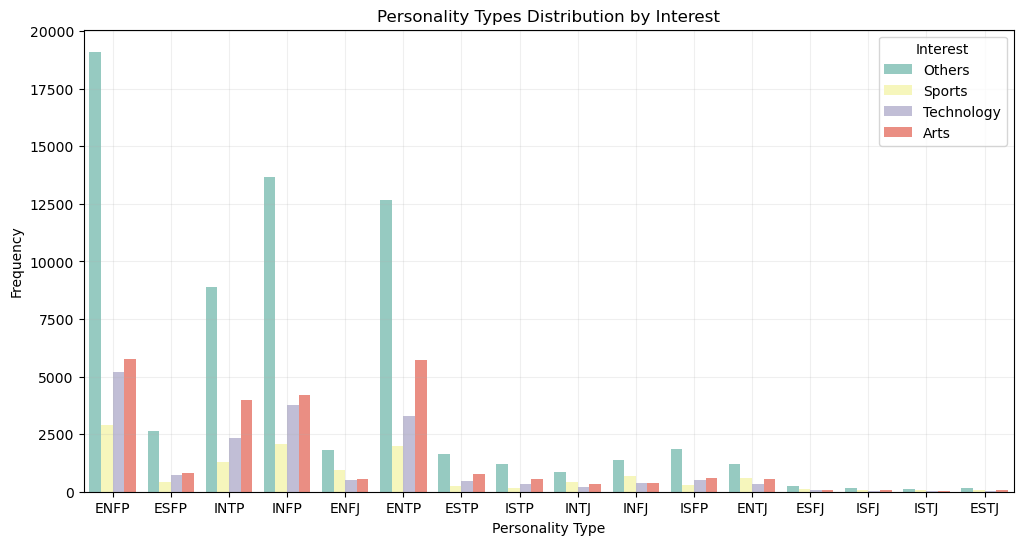

In [43]:
plt.figure(figsize=(12, 6))
sns.countplot(x=DF['Personality'],hue=DF['Interest'], palette='Set3')
plt.title('Personality Types Distribution by Interest')
plt.xlabel('Personality Type')
plt.ylabel('Frequency')
plt.grid(True,alpha=0.2)
plt.show()

In [44]:
bins=[0,18,22,30,40,50,57,60]
labels=[0,1,2,3,4,5,6]

In [45]:
DF_Combined.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,encoded_Gender,encoded_Interest,Personality_encoded
0,19.0,Male,0,1.548977,1.740607,0.363450,-0.156667,Others,ENFP,1,1,1
1,27.0,Female,0,0.296866,0.911320,-1.449241,-0.256451,Sports,ESFP,0,2,5
2,21.0,Female,0,0.723446,-1.431215,-0.806013,0.394536,Others,ENFP,0,1,1
3,28.0,Male,0,-1.030756,-0.218274,0.803258,1.011987,Others,INTP,1,1,11
4,36.0,Female,1,1.703455,-0.276203,0.113184,0.071085,Technology,ENFP,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
128056,27.0,Male,0,0.040910,2.267048,0.254805,-1.359170,Arts,ESTP,1,0,7
128057,19.0,Male,0,-0.690850,-2.160609,-0.096060,-0.661465,Others,INFP,1,1,9
128058,26.0,Female,1,1.095955,-1.392826,-0.877590,0.691914,Arts,ENFP,0,0,1
128059,24.0,Male,0,1.516789,-0.003760,-1.106047,1.569695,Others,ENFJ,1,1,0


In [46]:
DF_Combined['Age_Group']=pd.cut(DF_Combined['Age'],bins=bins,labels=labels)

In [47]:
DF_Combined.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality,encoded_Gender,encoded_Interest,Personality_encoded,Age_Group
0,19.0,Male,0,1.548977,1.740607,0.363450,-0.156667,Others,ENFP,1,1,1,1
1,27.0,Female,0,0.296866,0.911320,-1.449241,-0.256451,Sports,ESFP,0,2,5,2
2,21.0,Female,0,0.723446,-1.431215,-0.806013,0.394536,Others,ENFP,0,1,1,1
3,28.0,Male,0,-1.030756,-0.218274,0.803258,1.011987,Others,INTP,1,1,11,2
4,36.0,Female,1,1.703455,-0.276203,0.113184,0.071085,Technology,ENFP,0,3,1,3


In [48]:
cols_remove=['Gender','Interest','Personality']

In [49]:
DF_Combined.drop(columns=cols_remove,inplace=True)

In [50]:
DF_Combined.drop(columns='Age',inplace=True)

In [51]:
x=DF_Combined.drop(columns='Personality_encoded')

In [52]:
y=DF_Combined['Personality_encoded']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
models={'Decision_Tree':dtc(),'Random_Forest':rfc,'Support_Vector_Machine':SVC()}

In [55]:
model=dtc()

In [56]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
y_pred=model.predict(x_test)

In [125]:
accuracy_dt=accuracy_score(y_test, y_pred)
print(f"Accuracy Score For DecisionTreeClassifier is:--->{accuracy_dt:.2f}")

Accuracy Score For DecisionTreeClassifier is:--->0.86


In [111]:
dt_param_grid = {'max_depth': [10, 20, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'max_features': ['auto', 'sqrt', 'log2', None]}

In [114]:
dt_grid_search=GridSearchCV(estimator=model, param_grid=dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [115]:
print("Best parameters for Decision Tree: ", dt_grid_search.best_params_)

Best parameters for Decision Tree:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [116]:
best_dt_model = dt_grid_search.best_estimator_

In [118]:
dt_pred = best_dt_model.predict(x_test)

In [119]:
dt_accuracy = accuracy_score(y_test, dt_pred)

In [120]:
print(f"Test Accuracy for Decision Tree: {dt_accuracy:.4f}")

Test Accuracy for Decision Tree: 0.8925


In [122]:
dt_cv_score = cross_val_score(best_dt_model, x_train, y_train, cv=5, scoring='accuracy')

In [123]:
print(f"Decision Tree Cross-validation Accuracy: {dt_cv_score.mean():.4f}")

Decision Tree Cross-validation Accuracy: 0.8881


In [69]:
print(confusion_matrix(y_test,y_pred))

[[ 708    8    1    0   11    2    3    0   62    4    0    0    0    0
     0    0]
 [  14 6266    0    2    0  178    0    2    7  485    0    0    0    9
     0    0]
 [   1    0  476    2    0    0   14    1    0    0   33    2    0    0
     2    0]
 [   0    4    2 4440    0    2    0  131    0    1    4  392    0    0
     0   13]
 [  17    2    0    0   69    6    0    0    1    0    0    0    5    1
     0    0]
 [   2  174    0    0    3  727    0    3    0    8    0    0    3   61
     0    0]
 [   0    0    9    0    0    0   58    3    0    0    0    0    0    0
     8    0]
 [   0    0    0  117    0    2    3  467    0    0    0    8    0    1
     1   34]
 [  53    2    0    0    1    0    0    0  539    6    0    0    7    2
     1    0]
 [   3  492    0    2    0   21    0    0    5 4261    0    0    1  108
     0    2]
 [   0    0   32    2    0    0    2    0    1    0  310    8    0    0
     5    2]
 [   0    1    2  398    0    0    0   10    0    2    6 2923    

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       799
           1       0.90      0.90      0.90      6963
           2       0.91      0.90      0.90       531
           3       0.89      0.89      0.89      4989
           4       0.73      0.68      0.71       101
           5       0.72      0.74      0.73       981
           6       0.69      0.74      0.72        78
           7       0.71      0.74      0.73       633
           8       0.85      0.88      0.87       611
           9       0.87      0.87      0.87      4895
          10       0.87      0.86      0.86       362
          11       0.86      0.86      0.86      3415
          12       0.62      0.45      0.52        75
          13       0.70      0.68      0.69       670
          14       0.65      0.73      0.69        48
          15       0.72      0.73      0.72       462

    accuracy                           0.86     25613
   macro avg       0.79   

In [75]:
rfc_model=rfc()

In [76]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
y_pred_rfc=rfc_model.predict(x_test)

In [78]:
accuracy_rfc=accuracy_score(y_test,y_pred_rfc)

In [95]:
accuracy_rfc= accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy Score For DecisionTreeClassifier is:  --->{accuracy_rfc:.2f}")

Accuracy Score For DecisionTreeClassifier is:  --->0.90


In [134]:
param_grid = {'n_estimators':[10, 50], 'max_depth': [5, 10]}
grid_search = GridSearchCV(rfc_model, param_grid, cv=3, n_jobs=-1)  # Using 3-fold CV
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'n_estimators': [10, 50]})

In [133]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Best cross-validation score: 0.8850733722958788


In [101]:
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_pred_rfc))

Confusion Matrix:

[[ 729    7    0    0   13    1    1    0   43    3    0    0    2    0
     0    0]
 [   0 6396    0    0    0  186    0    0    0  368    0    0    0   13
     0    0]
 [   0    0  477    5    0    0   15    2    0    0   29    0    0    0
     3    0]
 [   0    2    0 4495    0    1    0  157    0    0    0  322    0    0
     0   12]
 [   9    0    0    0   80    7    0    0    0    0    0    0    4    1
     0    0]
 [   0   49    0    0    0  878    0    0    0    4    0    0    0   50
     0    0]
 [   0    0    3    0    0    0   63    6    0    0    0    0    0    0
     6    0]
 [   0    0    0   25    0    1    0  569    0    0    0    2    0    0
     0   36]
 [  43    1    0    0    2    0    0    0  551    7    0    0    6    1
     0    0]
 [   0  426    0    0    0   19    0    0    0 4316    0    0    0  134
     0    0]
 [   0    0   29    0    0    0    1    0    0    0  315    6    1    0
     9    1]
 [   0    0    0  299    0    0    0   10    0

In [104]:
print(f'Classification Report for Random Forest Classfier is:\n---------------------------------------------------------\n')
print(classification_report(y_test,y_pred_rfc))

Classification Report for Random Forest Classfier is:
---------------------------------------------------------

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       799
           1       0.93      0.92      0.92      6963
           2       0.94      0.90      0.92       531
           3       0.93      0.90      0.92      4989
           4       0.75      0.79      0.77       101
           5       0.76      0.90      0.82       981
           6       0.76      0.81      0.78        78
           7       0.73      0.90      0.81       633
           8       0.92      0.90      0.91       611
           9       0.91      0.88      0.90      4895
          10       0.91      0.87      0.89       362
          11       0.90      0.88      0.89      3415
          12       0.79      0.64      0.71        75
          13       0.74      0.86      0.79       670
          14       0.70      0.88      0.78        48
          15       0.7

In [90]:
svc_model=SVC()

In [92]:
svc_model.fit(x_train,y_train)

SVC()

In [93]:
y_pred_svc=svc_model.predict(x_test)

In [96]:
accuracy_svc=accuracy_score(y_test,y_pred_svc)
print(f"Accuracy Score For DecisionTreeClassifier is:  --->{accuracy_svc:.2f}")

Accuracy Score For DecisionTreeClassifier is:  --->0.87


In [139]:
param_grid = {
    'C': [0.1, 1],  # Reduced the number of values
    'kernel': ['linear'],  # Limited to one kernel (linear)
    'gamma': ['scale'],  # Default gamma value
}
grid_search = GridSearchCV(svc_model, param_grid, cv=3, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'gamma': ['scale'],
                         'kernel': ['linear']})

In [140]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 0.8244865508503265


In [102]:
print(f'Confusion Matrix is:\n')
print(confusion_matrix(y_test,y_pred_svc))

Confusion Matrix is:

[[ 672   62    5    0   11    3    1    0   44    1    0    0    0    0
     0    0]
 [  22 6404    0   17    0  158    0    0    4  346    0    3    0    9
     0    0]
 [   6    1  433   47    0    0   15    4    2    0   22    1    0    0
     0    0]
 [   0   41   21 4468    0    2    0  138    0    1    5  303    0    0
     0   10]
 [  19    1    0    0   62   12    0    0    2    0    0    0    4    1
     0    0]
 [   0  141    1    0    2  768    0    9    0    9    0    0    0   49
     0    2]
 [   1    0   11    2    0    1   53    6    0    0    0    1    0    0
     3    0]
 [   0    0    0  106    0    6    5  475    0    0    0    2    0    0
     0   39]
 [  33    6    2    0    0    1    0    0  512   45    5    0    6    1
     0    0]
 [   0  401    0    1    0   15    0    0   29 4331    0   15    0  102
     0    1]
 [   0    0   27    5    0    0    0    0   10    1  279   31    0    0
     8    1]
 [   0    1    4  270    0    0    0    8  

In [105]:
print(f'Classification Report for SVC is:\n---------------------------------------------------------\n')
print(classification_report(y_test,y_pred_svc))

Classification Report for SVC is:
---------------------------------------------------------

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       799
           1       0.91      0.92      0.91      6963
           2       0.86      0.82      0.84       531
           3       0.91      0.90      0.90      4989
           4       0.78      0.61      0.69       101
           5       0.75      0.78      0.77       981
           6       0.69      0.68      0.68        78
           7       0.71      0.75      0.73       633
           8       0.82      0.84      0.83       611
           9       0.89      0.88      0.89      4895
          10       0.83      0.77      0.80       362
          11       0.88      0.88      0.88      3415
          12       0.73      0.43      0.54        75
          13       0.73      0.73      0.73       670
          14       0.74      0.77      0.76        48
          15       0.73      0.78      0.7

## DecisionTreeClassifie Model Results
The accuracy of the DecisionTreeClassifier is `0.86`.

## Random Forest Model Results
The accuracy of the Random Forest model is `0.90`.

## SVC Model Results
The accuracy of the SVC model is `0.87`.

In [141]:
rfc_cm=confusion_matrix(y_test,y_pred_rfc)

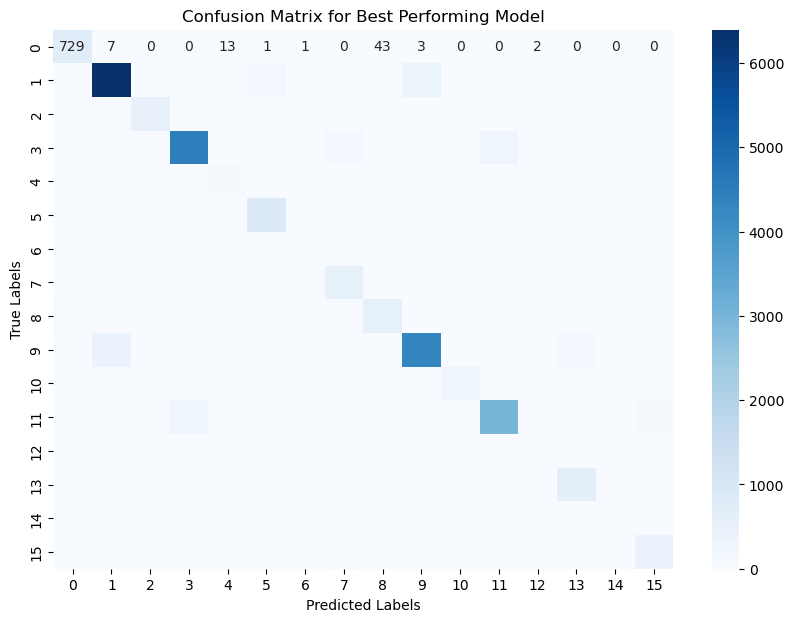

In [154]:
plt.figure(figsize=(10, 7))
sns.heatmap(rfc_cm,annot=True,fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Performing Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [149]:
importances=rfc_model.feature_importances_
features=x_train.columns 

In [150]:
importance_df=pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance')

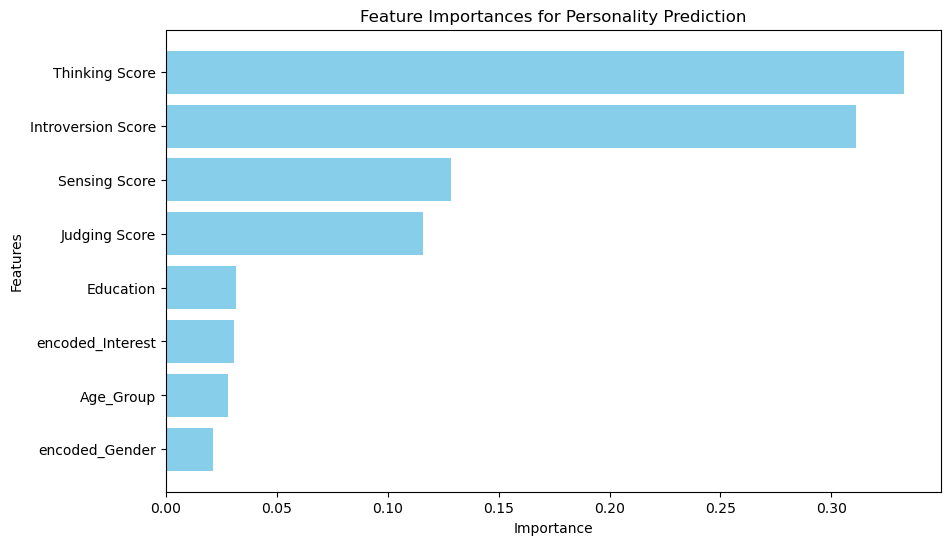

In [151]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Personality Prediction')
plt.show()

In [152]:
print(importance_df)

              Feature  Importance
5      encoded_Gender    0.021579
7           Age_Group    0.027926
6    encoded_Interest    0.031024
0           Education    0.031661
4       Judging Score    0.115789
2       Sensing Score    0.128449
1  Introversion Score    0.311080
3      Thinking Score    0.332492
